In [1]:
import pandas as pd
import numpy as np
import requests

In [2]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
# Read Data from CSV File
url_train = "https://raw.githubusercontent.com/neha-mishra/Evaluation-Projects/main/Flight_Price_Prediction/Data_Train.xlsx"
url_test = "https://raw.githubusercontent.com/neha-mishra/Evaluation-Projects/main/Flight_Price_Prediction/Test_Sample_submission.xlsx"

df_train = pd.read_excel(url_train)
df_test = pd.read_excel(url_test)

# Adjust index to start from 1 instead of 0
df_train.index += 1
df_test.index += 1

In [4]:
# Show top 5 rows of DataFrame
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
2,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
3,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
4,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
5,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
# Show top 5 rows of DataFrame
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,15998
2,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,16612
3,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,25572
4,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,25778
5,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,16934


In [6]:
# Check DataFrame Shape
df_train.shape

(10683, 11)

In [7]:
# Check DataFrame Shape
df_test.shape

(2671, 11)

In [8]:
# Get full info of DataFrame
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 1 to 10683
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
# Get full info of DataFrame
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 1 to 2671
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
 10  Price            2671 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 229.7+ KB


In [10]:
# Get Summery of DataFrame
df_train.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [11]:
# Get Summery of DataFrame
df_test.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671.000000
unique,11,44,5,6,100,199,704,320,5,6,NaN
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info,NaN
freq,897,144,1145,1145,624,62,113,122,1431,2148,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20159.514414
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5005.399225
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10138.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16469.500000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19582.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23476.500000


In [12]:
# Get DataFrame of rows with missing data
null_data_train = df_train[df_train.isnull().any(axis=1)]
null_data_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9040,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [13]:
# Dropping NAN values
df_train.dropna(inplace = True)

In [14]:
# Get DataFrame of rows with missing data
null_data_test = df_test[df_test.isnull().any(axis=1)]
null_data_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [15]:
# Duplicate values
df_train[df_train.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
684,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1062,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1349,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1419,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1675,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303


In [16]:
# Checking different Airlines
df_train["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [17]:
df_train["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

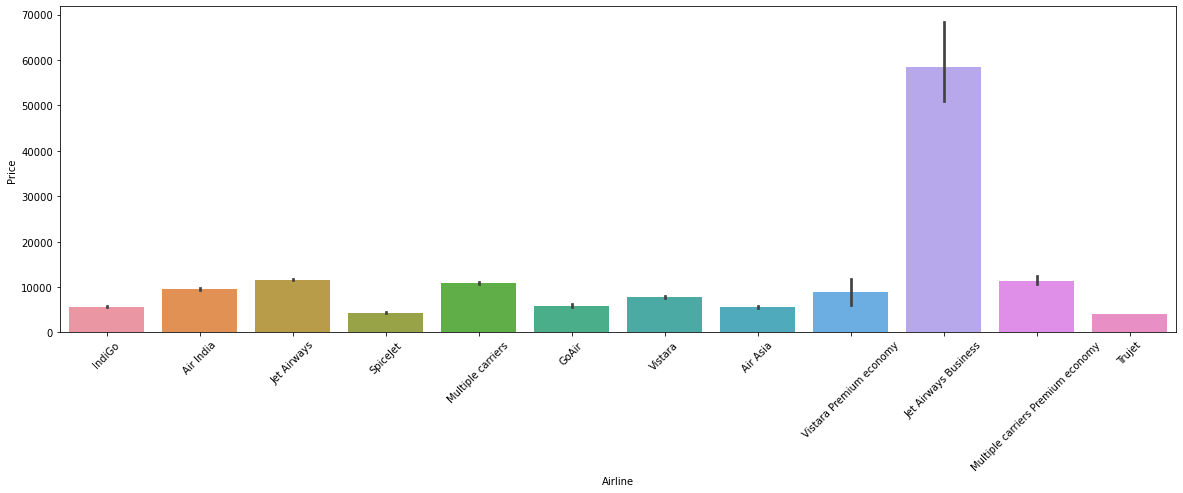

In [19]:
# Price vs Airline
plt.figure(figsize=(20, 6))
sns.barplot(data=df_train, x = 'Airline', y='Price')
plt.xticks(rotation=45)
plt.show()

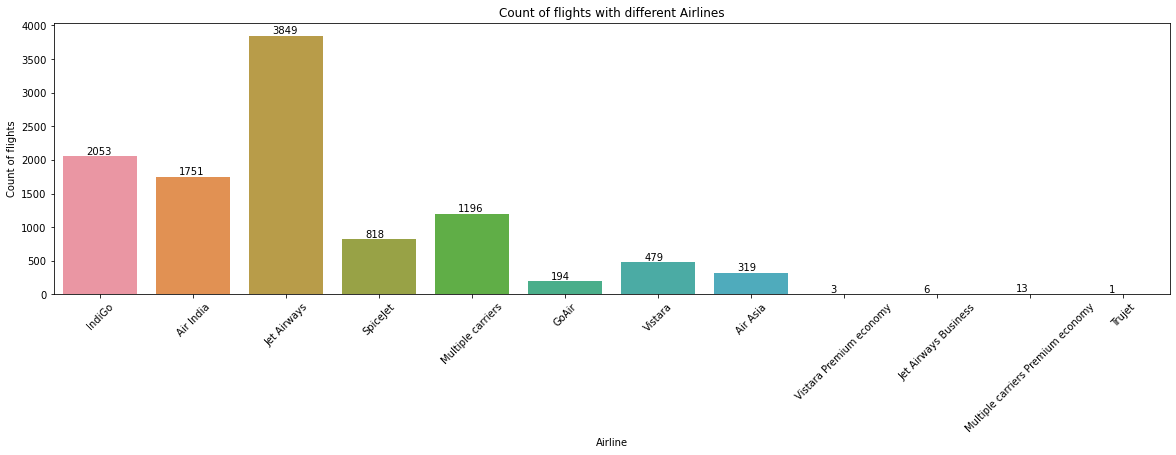

In [20]:
# Types of Airline vs Number of Flights

plt.figure(figsize = (20,5))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =df_train)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

Text(0, 0.5, 'Price of ticket')

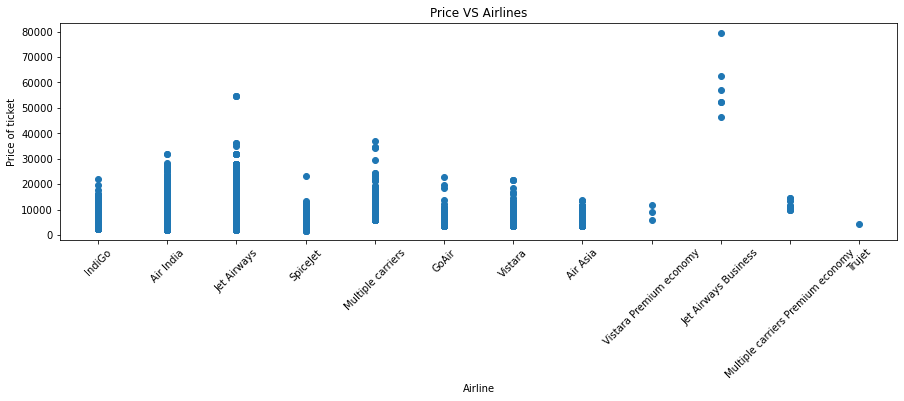

In [22]:
# Ticket Prices VS Airlines

plt.figure(figsize = (15,4))
plt.title('Price VS Airlines')
plt.scatter(df_train['Airline'], df_train['Price'])
plt.xticks
plt.xlabel('Airline')
plt.xticks(rotation=45)
plt.ylabel('Price of ticket')

In [23]:
set(df_train["Airline"]) == set(df_test["Airline"])

False

In [24]:
df_train = df_train[df_train["Airline"] != "Trujet"]
set(df_train["Airline"]) == set(df_test["Airline"])

True

In [25]:
# Label Encoding
le = LabelEncoder()
df_train["Airline"] = le.fit_transform(df_train["Airline"])
df_test["Airline"] = le.transform(df_test["Airline"])

In [26]:
df_train["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: Source, dtype: int64

In [27]:
df_test["Source"].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

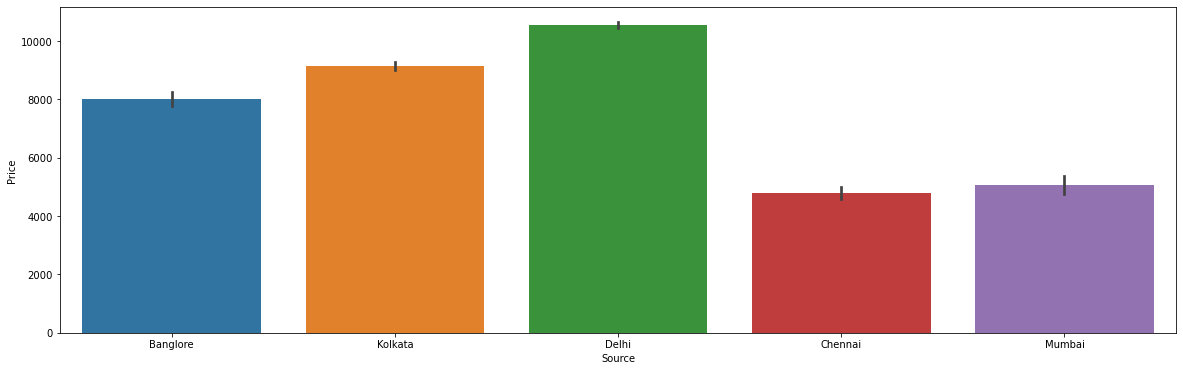

In [28]:
# Price vs Source
plt.figure(figsize=(20, 6))
sns.barplot(data=df_train, x = 'Source', y='Price')
plt.show()

In [29]:
set(df_train.Source) == set(df_test.Source)

True

In [30]:
df_train["Source"] = le.fit_transform(df_train["Source"])
df_test["Source"] = le.transform(df_test["Source"])

In [31]:
df_train["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

In [32]:
df_test["Destination"].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

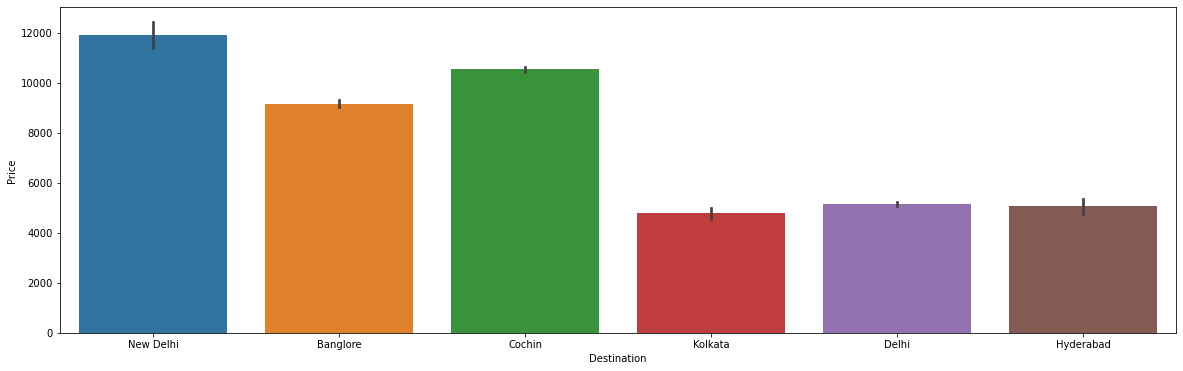

In [33]:
# Price vs Destination
plt.figure(figsize=(20, 6))
sns.barplot(data=df_train, x='Destination', y='Price')
plt.show()

In [34]:
set(df_train["Destination"]) == set(df_test["Destination"])

True

In [35]:
df_train["Destination"] = le.fit_transform(df_train["Destination"])
df_test["Destination"] = le.transform(df_test["Destination"])

In [36]:
df_train["Total_Stops"] = df_train["Total_Stops"].str[0]
df_test["Total_Stops"] = df_test["Total_Stops"].str[0]

df_train["Total_Stops"] = df_train["Total_Stops"].apply(lambda x: str(x) if str(x).isdigit() else 0).astype('int64')
df_test["Total_Stops"] = df_test["Total_Stops"].apply(lambda x: str(x) if str(x).isdigit() else 0).astype('int64')

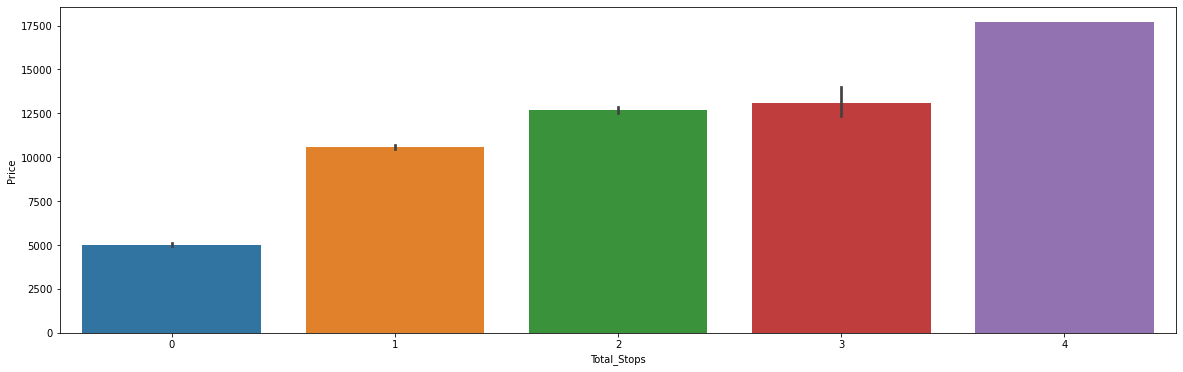

In [37]:
plt.figure(figsize=(20, 6))
sns.barplot(data=df_train, x = 'Total_Stops', y='Price')
plt.show()

In [38]:
# Checking the Additional_info column for unique values.
df_train["Additional_Info"].value_counts()

No info                         8343
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [39]:
set(df_train["Additional_Info"]) == set(df_test["Additional_Info"])

False

In [40]:
df_train["Additional_Info"] = df_train["Additional_Info"].replace('No Info', 'No info')

In [41]:
df_train["Additional_Info"] = df_train["Additional_Info"].replace(['2 Long layover', '1 Short layover', 'Red-eye flight', 'Rare'])

In [42]:
df_train = df_train[df_train["Additional_Info"] != 'Rare']

In [43]:
set(df_train["Additional_Info"]) == set(df_test["Additional_Info"])

True

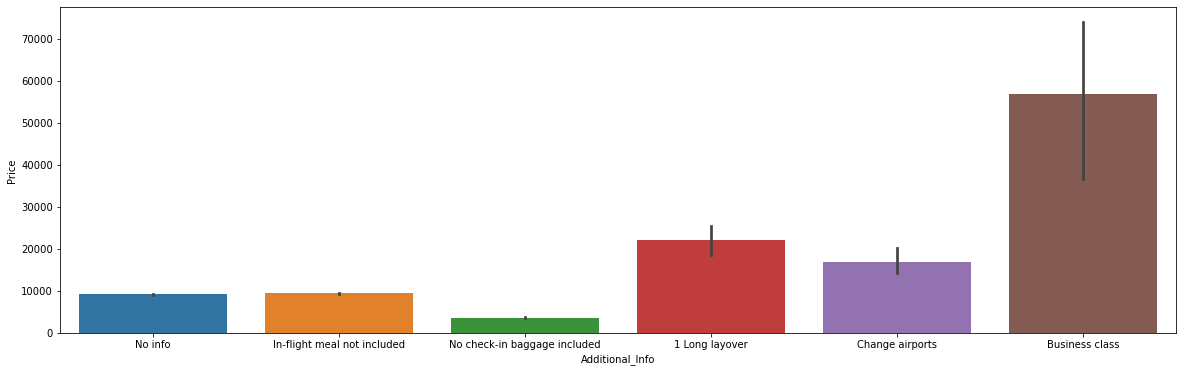

In [44]:
plt.figure(figsize=(20, 6))
sns.barplot(data=df_train, x = 'Additional_Info', y='Price')
plt.show()

In [45]:
df_train["Additional_Info"] = le.fit_transform(df_train["Additional_Info"])
df_test["Additional_Info"] = le.transform(df_test["Additional_Info"])

In [46]:
df_train['Duration'] = df_train['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
df_test['Duration'] = df_test['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [47]:
df_train["Date_of_Journey"] = pd.to_datetime(df_train["Date_of_Journey"])
df_test["Date_of_Journey"] = pd.to_datetime(df_test["Date_of_Journey"])

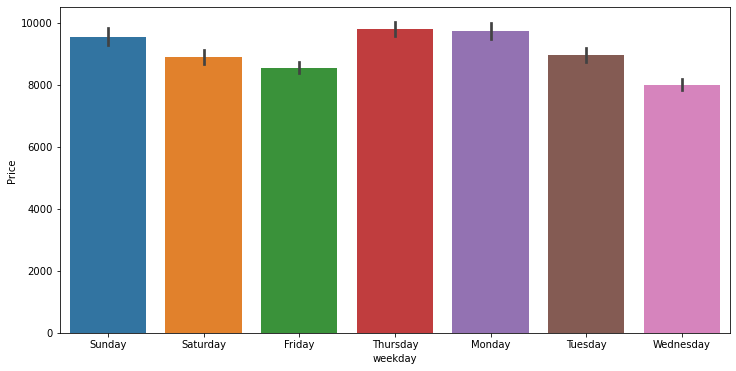

In [48]:
# Create additional column
df_train['weekday'] = df_train['Date_of_Journey'].dt.day_name()
df_test['weekday'] = df_test['Date_of_Journey'].dt.day_name()

plt.figure(figsize=(12, 6))
sns.barplot(data=df_train, x='weekday', y='Price')
plt.show()

df_train['weekday'] = le.fit_transform(df_train['weekday'])
df_test['weekday'] = le.transform(df_test['weekday'])


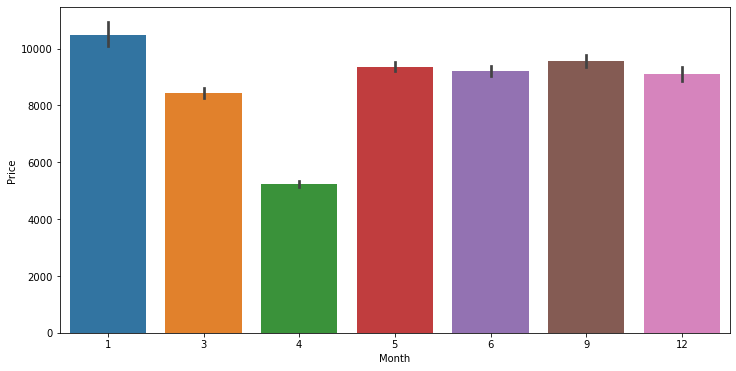

In [49]:
df_train['Month'] = df_train['Date_of_Journey'].dt.month
df_test['Month'] = df_test['Date_of_Journey'].dt.month

plt.figure(figsize=(12, 6))
sns.barplot(data=df_train, x='Month', y='Price')
plt.show()

In [50]:
df_train.drop(columns=['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time'], axis=1, inplace=True)
df_test.drop(columns=['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time',], axis=1, inplace=True)

In [51]:
# Reorder Columns
df_train = df_train[['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'Additional_Info', 'weekday', 'Month', 'Price']]

df_test = df_test[['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'Additional_Info', 'weekday', 'Month']] 

In [52]:
df_train.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,weekday,Month,Price
1,3,0,5,170,0,5,3,3,3897
2,1,3,0,445,2,5,2,1,7662
3,4,2,1,1140,2,5,0,9,13882
4,3,3,0,325,1,5,4,12,6218
5,3,0,5,285,1,5,4,1,13302


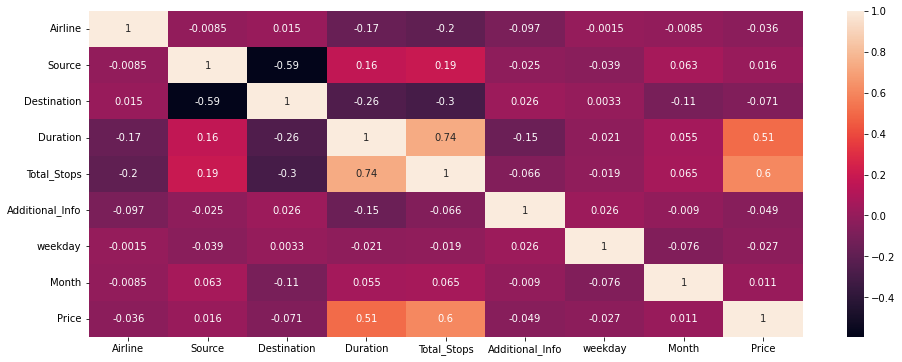

In [53]:
# Heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

In [54]:
# Split the dataset into the input and the output values
array = df_train.values
X = array[:, 0:8]
Y = array[:, 8]

In [55]:
# Rescale data 
from sklearn.preprocessing import Normalizer

nz = Normalizer()
rescaled_X_train = nz.fit_transform(X)
rescaled_X_test = nz.transform(df_test)
rescaled_X_train

/Users/nehamishra/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Normalizer was fitted without feature names
  warnings.warn(


array([[0.0176236 , 0.        , 0.02937266, ..., 0.02937266, 0.0176236 ,
        0.0176236 ],
       [0.00224694, 0.00674082, 0.        , ..., 0.01123471, 0.00449388,
        0.00224694],
       [0.0035086 , 0.0017543 , 0.00087715, ..., 0.00438574, 0.        ,
        0.00789434],
       ...,
       [0.02219996, 0.        , 0.01109998, ..., 0.02774996, 0.01109998,
        0.02219996],
       [0.0560881 , 0.        , 0.03116006, ..., 0.03116006, 0.02492805,
        0.00623201],
       [0.00199947, 0.00399894, 0.00199947, ..., 0.00999736, 0.00799789,
        0.01799525]])

In [56]:
# Splitting the dataset into training and validation set using the train test split
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(rescaled_X_train, Y, test_size=0.20, random_state=1)

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

models = []

models.append(('LR', LinearRegression()))
models.append(('LA', Lasso()))
models.append(('RFR', RandomForestRegressor()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVM', SVR()))
models.append(('DTR', DecisionTreeRegressor()))

names = []
results = []

for name, model in models:
    model = model.fit(x_train, y_train)
    accuracy = model.score(x_valid, y_valid)
    results.append(accuracy)
    names.append(name)
    print('%s:%f'%(name, accuracy))

LR:0.393797
LA:0.380705
RFR:0.692569
EN:0.000727
KNN:0.673427
SVM:-0.027166
DTR:0.477569


In [58]:
# Random Forest Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


array = [10, 50, 100, 200, 500]

for num_trees in array:
    max_features = 5
    kfold = KFold(n_splits=10)
    model_1 = RandomForestRegressor(n_estimators=num_trees, max_features=max_features)
    results = cross_val_score(model_1, X, Y, cv=kfold)
    print('num_trees : %f (%f)'%(num_trees, results.mean()))

num_trees : 10.000000 (0.789182)
num_trees : 50.000000 (0.800203)
num_trees : 100.000000 (0.802469)
num_trees : 200.000000 (0.803246)
num_trees : 500.000000 (0.803361)


In [59]:
max_features = 5
model_2 = RandomForestRegressor(n_estimators=200, max_features=max_features)
model_2.fit(X, Y)
predictions = model_2.predict(df_test)
predictions

/Users/nehamishra/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([15109.617     ,  4542.37      , 12898.        , ...,
       15086.225     ,  9416.09541667,  8675.26875   ])